INF2178 A1
Chloe Jinxuan Li
1010033321

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind


#import file from my Google drive
from google.colab import drive
drive.mount ("/drive", force_remount=True)

# Load the dataset
df = pd.read_excel('/drive/My Drive/INF2178_A1_data.xlsx')



Mounted at /drive


In [3]:
# exam the data
df.head()

# inspect data types and missing values
df.info()

# describe the data
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50944 entries, 0 to 50943
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   OCCUPANCY_DATE          50944 non-null  datetime64[ns]
 1   ORGANIZATION_NAME       50944 non-null  object        
 2   PROGRAM_ID              50944 non-null  int64         
 3   PROGRAM_NAME            50909 non-null  object        
 4   SECTOR                  50944 non-null  object        
 5   PROGRAM_MODEL           50942 non-null  object        
 6   OVERNIGHT_SERVICE_TYPE  50942 non-null  object        
 7   PROGRAM_AREA            50942 non-null  object        
 8   SERVICE_USER_COUNT      50944 non-null  int64         
 9   CAPACITY_TYPE           50944 non-null  object        
 10  CAPACITY_ACTUAL_BED     32399 non-null  float64       
 11  OCCUPIED_BEDS           32399 non-null  float64       
 12  CAPACITY_ACTUAL_ROOM    18545 non-null  float6

,PROGRAM_ID,SERVICE_USER_COUNT,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
count,50944.000000,50944.000000,32399.000000,32399.000000,18545.000000,18545.000000
mean,13986.125844,45.727171,31.627149,29.780271,55.549259,52.798598
std,1705.288632,53.326049,27.127682,26.379416,59.448805,58.792954
min,11791.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,12233.000000,15.000000,15.000000,14.000000,19.000000,16.000000
50%,14251.000000,28.000000,25.000000,23.000000,35.000000,34.000000
75%,15651.000000,51.000000,43.000000,41.000000,68.000000,66.000000
max,16631.000000,339.000000,234.000000,234.000000,268.000000,268.000000


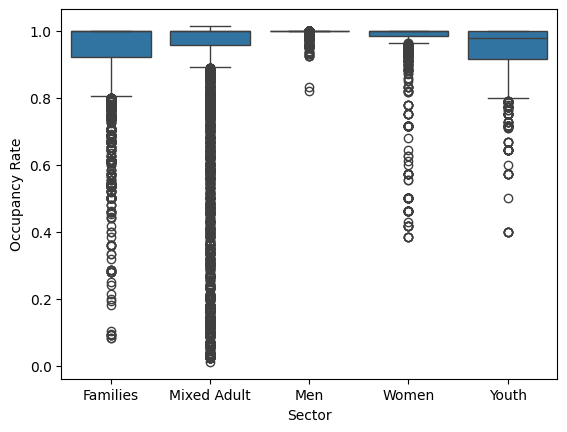

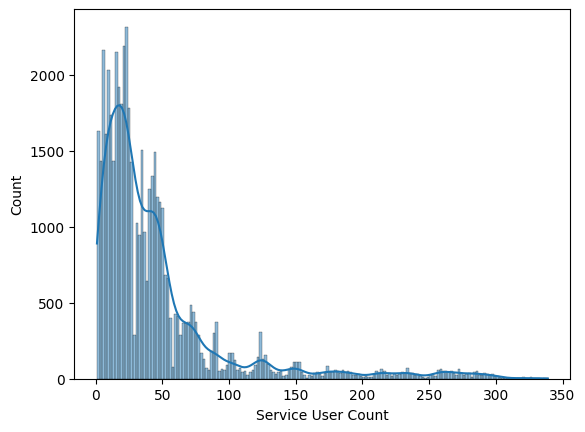

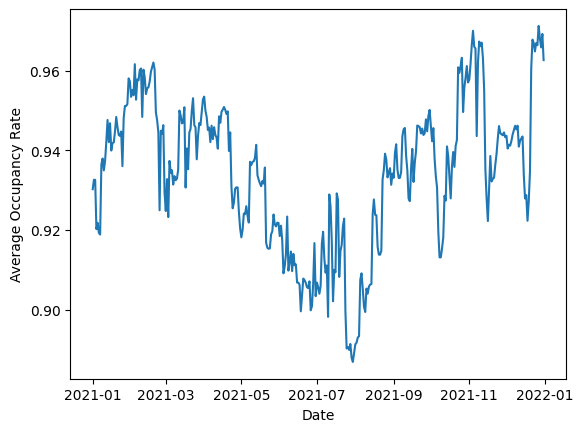

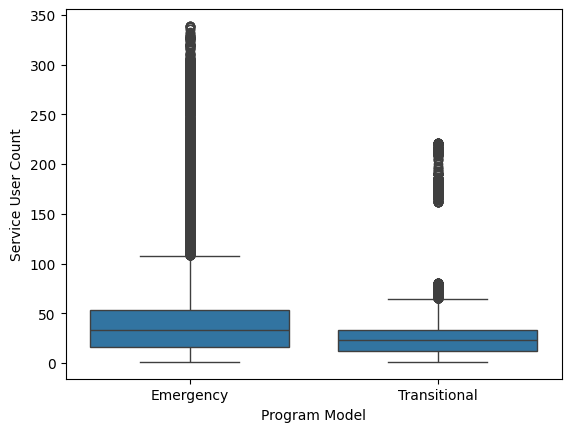

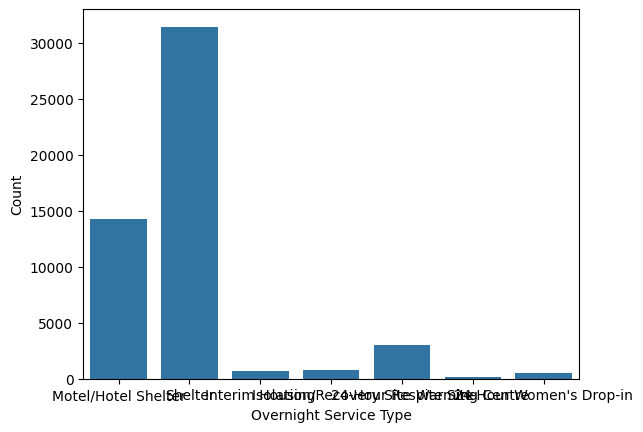

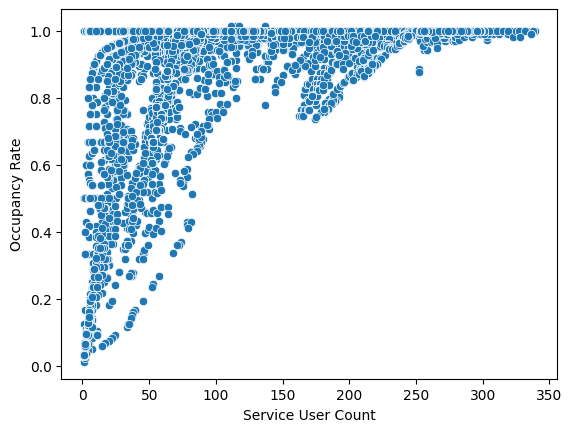

In [4]:
# calculate the occupancy rate
df['ROOM_OCCUPANCY_RATE'] = df['OCCUPIED_ROOMS'] / (df['CAPACITY_ACTUAL_ROOM'] + 0.00001)

# boxplot of ROOM_OCCUPANCY_RATE by SECTOR
sns.boxplot(x='SECTOR', y='ROOM_OCCUPANCY_RATE', data=df)
plt.xlabel('Sector')
plt.ylabel('Occupancy Rate')
plt.show()

# plot the distribution of SERVICE_USER_COUNT
sns.histplot(df['SERVICE_USER_COUNT'].dropna(), kde=True)
plt.xlabel('Service User Count')
plt.show()

# average occupancy rate over time
df['OCCUPANCY_DATE'] = pd.to_datetime(df['OCCUPANCY_DATE'])
df_grouped_by_date = df.groupby('OCCUPANCY_DATE')['ROOM_OCCUPANCY_RATE'].mean().reset_index()

sns.lineplot(x='OCCUPANCY_DATE', y='ROOM_OCCUPANCY_RATE', data=df_grouped_by_date)
plt.xlabel('Date')
plt.ylabel('Average Occupancy Rate')
plt.show()


# boxplot of SERVICE_USER_COUNT by PROGRAM_MODEL
sns.boxplot(x='PROGRAM_MODEL', y='SERVICE_USER_COUNT', data=df)
plt.xlabel('Program Model')
plt.ylabel('Service User Count')
plt.show()

# distribution of overnight service types
sns.countplot(x='OVERNIGHT_SERVICE_TYPE', data=df)
plt.xlabel('Overnight Service Type')
plt.ylabel('Count')
plt.show()


# Scatter Plot of Service User Count vs. Occupancy Rate
sns.scatterplot(x='SERVICE_USER_COUNT', y='ROOM_OCCUPANCY_RATE', data=df)
plt.xlabel('Service User Count')
plt.ylabel('Occupancy Rate')
plt.show()




In [9]:
# clean the dataset by removing rows with missing data in key columns
df_cleaned = df.dropna(subset=['ROOM_OCCUPANCY_RATE', 'PROGRAM_MODEL', 'SECTOR'])


# occupancy rates based on the type of overnight service provided
for service in df_cleaned['OVERNIGHT_SERVICE_TYPE'].unique():
    service_rates = df_cleaned[df_cleaned['OVERNIGHT_SERVICE_TYPE'] == service]['ROOM_OCCUPANCY_RATE']

    # t-test against the collective occupancy rate
    if not service_rates.empty:
        stats, pval = ttest_ind(service_rates, df_cleaned['ROOM_OCCUPANCY_RATE'], equal_var=False)

        # output the test results
        print(f"Service Type: {service}")
        print(f"  T-Value: {stats}")
        print(f"  P-Value: {pval}")

# occupancy rates by program area
for program in df_cleaned['PROGRAM_AREA'].unique():
    program_data = df_cleaned[df_cleaned['PROGRAM_AREA'] == program]['ROOM_OCCUPANCY_RATE']

    # t-test in relation to the average occupancy rate
    if program_data.any():
        stat_value, significance = ttest_ind(program_data, df_cleaned['ROOM_OCCUPANCY_RATE'], equal_var=False)

        # output the test results
        print(f"Analysis for Program Area: {program}")
        print(f"  T-Value: {stat_value}")
        print(f"  P-Value: {significance}")


Service Type: Motel/Hotel Shelter
  T-Value: 27.894461203891588
  P-Value: 7.007613270131504e-169
Service Type: Shelter
  T-Value: -9.945919437734808
  P-Value: 4.578136366982899e-23
Service Type: Interim Housing
  T-Value: 2.6957796766363016
  P-Value: 0.007170598072855586
Service Type: Isolation/Recovery Site
  T-Value: -65.4780488119062
  P-Value: 0.0
Analysis for Program Area: COVID-19 Response
  T-Value: 0.7884669167825236
  P-Value: 0.4304298537526714
Analysis for Program Area: Temporary Refugee Response
  T-Value: 14.150063735436088
  P-Value: 1.7618563911229607e-41
Analysis for Program Area: Base Shelter and Overnight Services System
  T-Value: -4.742184074914945
  P-Value: 2.1635149419946284e-06
